In [4]:
!pip install landingai pillow

from PIL import Image
from landingai.predict import Predictor
from google.colab import files

# Upload image
uploaded = files.upload()
image = Image.open(next(iter(uploaded)))

# Securely input API key (will prompt you)
from getpass import getpass
api_key = getpass("Enter Landing.ai API Key: ")                               # Enter the API key as after deploying model on landingai
endpoint_id = "ee5b5960-880b-4b39-ae43-2c414d3eccf1"

# Run inference
predictor = Predictor(endpoint_id, api_key=api_key)
predictions = predictor.predict(image)
print(predictions)

Saving WhatsApp Image 2025-05-04 at 00.27.59_98a7d1db.jpg to WhatsApp Image 2025-05-04 at 00.27.59_98a7d1db.jpg
Enter Landing.ai API Key: ··········
[ObjectDetectionPrediction(score=0.96046382188797, label_name='Perfume', label_index=2, id='04d68738-0f51-4f14-a022-6f071429a3f6', bboxes=(268, 120, 824, 1154))]


In [43]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python pillow numpy
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
from google.colab import files
import cv2
import pytesseract
from PIL import Image
import re
import numpy as np
from google.colab import files

class MedicineLabelReader:
    def __init__(self):
        # Set Tesseract path for Colab
        pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

        # Medicine database
        self.medicine_db = {
            "cetirizine": {"type": "antihistamine (allergy relief)","dosage": "10mg","side_effects": ["drowsiness", "dry mouth"]},
            "paracetamol": {"type": "pain reliever", "dosage": "500mg", "side_effects": ["nausea", "headache"]},
            "ibuprofen": {"type": "NSAID", "dosage": "200mg", "side_effects": ["stomach pain", "dizziness"]},
            "amoxicillin": {"type": "antibiotic", "dosage": "250mg", "side_effects": ["diarrhea", "rash"]}
        }

    def preprocess_image(self, image_path):
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        denoised = cv2.fastNlMeansDenoising(thresh, None, 30, 7, 21)
        return denoised

    def extract_text(self, image):
        text = pytesseract.image_to_string(image)
        return text.lower()

    def identify_medicine(self, text):
        found_medicines = []
        for med_name in self.medicine_db.keys():
            if re.search(r'\b' + re.escape(med_name) + r'\b', text):
                found_medicines.append(med_name)
        return found_medicines

    def get_medicine_info(self, medicine_name):
        return self.medicine_db.get(medicine_name, "Medicine not found in database")

    def process_label(self, image_path):
        processed_img = self.preprocess_image(image_path)
        extracted_text = self.extract_text(processed_img)
        medicines = self.identify_medicine(extracted_text)

        results = []
        for med in medicines:
            results.append({
                "medicine": med,
                "info": self.get_medicine_info(med),
                "extracted_text": extracted_text
            })
        return results

# Upload an image
print("Upload a medicine label image (e.g., medicine_label.jpg)")
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Process the image
reader = MedicineLabelReader()
result = reader.process_label(image_name)

# Display results
print("\nDetected Medicines:", [r['medicine'] for r in result])
for med in result:
    print(f"\nInformation for {med['medicine']}:")
    print(f"Type: {med['info']['type']}")
    print(f"Standard Dosage: {med['info']['dosage']}")
    print(f"Possible Side Effects: {', '.join(med['info']['side_effects'])}")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Upload a medicine label image (e.g., medicine_label.jpg)


Saving med_lable.jpg to med_lable (12).jpg

Detected Medicines: ['paracetamol']

Information for paracetamol:
Type: pain reliever
Standard Dosage: 500mg
Possible Side Effects: nausea, headache


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
--2025-05-03 20:31:22--  https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 [following]
--2025-05-03 20:31:22--  https://raw.githubusercontent.com/oarriaga/face_classification/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to r

Saving happy_man.jpg to happy_man (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


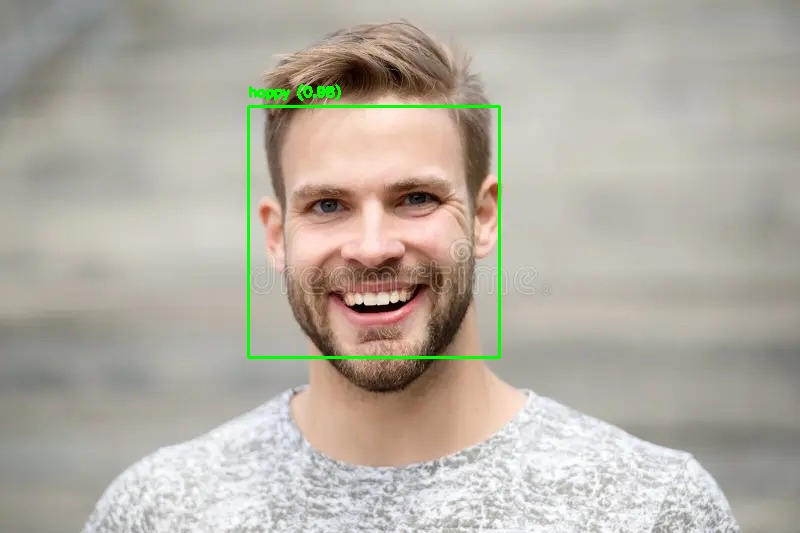


Assistant: I see you're happy! Would you like to share what's making you smile?
Detected emotion: happy (confidence: 0.98)


In [47]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python pillow numpy keras tensorflow

import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from google.colab import files
from IPython.display import display, Image
import os

# Download pre-trained models with error handling
def download_models():
    models = {
        'haarcascade': ('https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml',
                       'haarcascade_frontalface_default.xml'),
        'emotion_model': ('https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5',
                         'emotion_model.h5')
    }

    for name, (url, filename) in models.items():
        if not os.path.exists(filename):
            !wget -O {filename} {url}
            if not os.path.exists(filename):
                raise FileNotFoundError(f"Failed to download {name} model")

download_models()

class EmotionDetector:
    def __init__(self):
        # Verify and load models
        if not os.path.exists('haarcascade_frontalface_default.xml'):
            raise FileNotFoundError("Haar cascade file missing")
        if not os.path.exists('emotion_model.h5'):
            raise FileNotFoundError("Emotion model file missing")

        self.face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        try:
            self.emotion_model = load_model('emotion_model.h5', compile=False)
        except Exception as e:
            raise Exception(f"Error loading emotion model: {str(e)}")

        self.EMOTIONS = ["angry", "disgust", "scared", "happy", "sad", "surprised", "neutral"]

    def detect_faces(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE
        )
        return faces, gray

    def predict_emotion(self, face_roi):
        try:
            roi = cv2.resize(face_roi, (64, 64))
            roi = roi.astype("float") / 255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)

            preds = self.emotion_model.predict(roi)[0]
            emotion_prob = np.max(preds)
            emotion = self.EMOTIONS[np.argmax(preds)]
            return emotion, emotion_prob
        except Exception as e:
            print(f"Error predicting emotion: {str(e)}")
            return "unknown", 0.0

    def provide_response(self, emotion):
        responses = {
            "happy": "I see you're happy! Would you like to share what's making you smile?",
            "sad": "I notice you seem sad. Would you like to talk about it?",
            "angry": "You appear frustrated. Would deep breathing exercises help?",
            "surprised": "You look surprised! Is there something unexpected happening?",
            "neutral": "How are you feeling today? I'm here if you'd like to talk.",
            "scared": "You seem anxious. Would you like me to guide you through relaxation?",
            "disgust": "You appear displeased. Is there something bothering you?",
            "unknown": "I'm having trouble reading your expression. Could you try again?"
        }
        return responses.get(emotion, "How are you feeling today?")

    def process_frame(self, frame):
        try:
            faces, gray = self.detect_faces(frame)
            results = []

            for (x, y, w, h) in faces:
                face_roi = gray[y:y + h, x:x + w]
                emotion, prob = self.predict_emotion(face_roi)
                response = self.provide_response(emotion)

                results.append({
                    "face_box": (x, y, w, h),
                    "emotion": emotion,
                    "confidence": prob,
                    "response": response
                })

                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, f"{emotion} ({prob:.2f})", (x, y - 10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

            return frame, results
        except Exception as e:
            print(f"Error processing frame: {str(e)}")
            return frame, []

def process_uploaded_image():
    uploaded = files.upload()
    if not uploaded:
        print("No files uploaded. Please try again.")
        return

    for filename in uploaded.keys():
        try:
            img = cv2.imread(filename)
            if img is None:
                raise ValueError("Could not read the image file")

            detector = EmotionDetector()
            processed_img, results = detector.process_frame(img)

            output_filename = 'processed_' + filename
            cv2.imwrite(output_filename, processed_img)
            display(Image(output_filename))

            if results:
                print("\nAssistant:", results[0]['response'])
                print(f"Detected emotion: {results[0]['emotion']} (confidence: {results[0]['confidence']:.2f})")
            else:
                print("No faces detected in the image.")

        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")

# Run the processing
print("Please upload an image containing faces:")
process_uploaded_image()